In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [2]:
tickers = ['SQ', 'MSFT', 'NVDA', 'GP']
myData = pd.DataFrame()
for t in tickers:
    myData[t] = wb.DataReader(t, data_source='yahoo', start='2019-11-21')['Adj Close']

In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2019-11-21 to 2020-12-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SQ      267 non-null    float64
 1   MSFT    267 non-null    float64
 2   NVDA    267 non-null    float64
 3   GP      74 non-null     float64
dtypes: float64(4)
memory usage: 10.4 KB


In [4]:
myData.head()

,SQ,MSFT,NVDA,GP
Date,,,,
2019-11-21,67.419998,147.913040,209.679031,NaN
2019-11-22,67.750000,148.021912,210.387360,NaN
2019-11-25,68.250000,149.644714,220.682755,NaN
2019-11-26,68.940002,150.436340,216.482788,NaN
2019-11-27,69.650002,150.723297,217.880493,NaN


In [5]:
myData.tail()

,SQ,MSFT,NVDA,GP
Date,,,,
2020-12-07,212.580002,214.289993,544.270020,18.330000
2020-12-08,213.009995,216.009995,534.000000,21.990000
2020-12-09,207.039993,211.800003,517.229980,19.510000
2020-12-10,217.250000,210.520004,518.890015,19.129999
2020-12-11,216.589996,213.259995,520.530029,18.270000


### Normalization to 100:
\begin{align*}
\frac{{P}_t}{{P}_0} * 100
\end{align*}


In [6]:
myData.iloc[0]

SQ       67.419998
MSFT    147.913040
NVDA    209.679031
GP             NaN
Name: 2019-11-21 00:00:00, dtype: float64

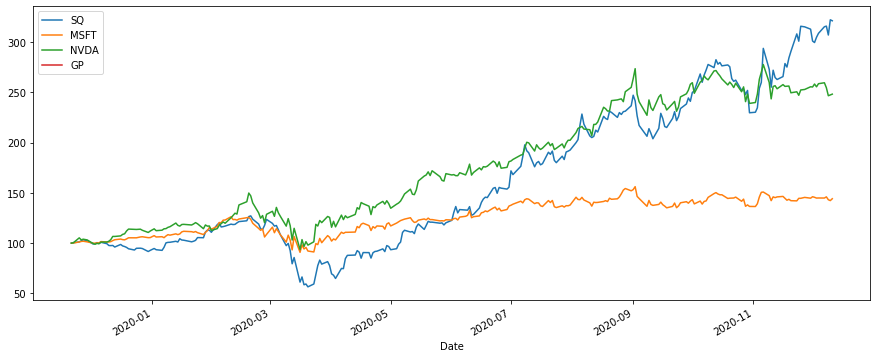

In [7]:
(myData / myData.iloc[0] * 100).plot(figsize = (15,6))

### Calculating the Return of a Portfolio of securities.

In [8]:
returns = (myData/myData.shift(1))-1
returns

,SQ,MSFT,NVDA,GP
Date,,,,
2019-11-21,NaN,NaN,NaN,NaN
2019-11-22,0.004895,0.000736,0.003378,NaN
2019-11-25,0.007380,0.010963,0.048935,NaN
2019-11-26,0.010110,0.005290,-0.019032,NaN
2019-11-27,0.010299,0.001907,0.006456,NaN
...,...,...,...,...
2020-12-07,0.021283,-0.000327,0.003577,-0.011860
2020-12-08,0.002023,0.008027,-0.018869,0.199673
2020-12-09,-0.028027,-0.019490,-0.031405,-0.112779


In [9]:
returns.tail()

,SQ,MSFT,NVDA,GP
Date,,,,
2020-12-07,0.021283,-0.000327,0.003577,-0.011860
2020-12-08,0.002023,0.008027,-0.018869,0.199673
2020-12-09,-0.028027,-0.019490,-0.031405,-0.112779
2020-12-10,0.049314,-0.006043,0.003209,-0.019477
2020-12-11,-0.003038,0.013015,0.003161,-0.044956


In [10]:
weights = np.array([0.40,0.2,0.15,0.25])

In [11]:
check = np.dot(returns,weights )

In [12]:
annual_returns = returns.mean() * 250
annual_returns

SQ      1.355147
MSFT    0.434722
NVDA    1.016767
GP      0.509554
dtype: float64

In [13]:
np.dot(annual_returns, weights)

0.9089069856488081

In [14]:
portfolio_1 = str(round(np.dot(annual_returns,weights),5)*100) + '%'

In [15]:
weights_2 = np.array([0.4,0.4, 0.15, 0.05])

In [16]:
portfolio_2 =  str(round(np.dot(annual_returns,weights_2),5)*100) + '%'

In [17]:
print(portfolio_1)
print(portfolio_2)

90.891%
89.39399999999999%
